In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


###### repalcing -999999 with 2 
train_data['var3'] = train_data['var3'].replace(-999999, 2)

########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.95)


##### Dropping highly corelated columns #####################

train_data =  train_data.drop(['delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_reemb_var33_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var13_medio',
 'ind_var18',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var32',
 'ind_var34',
 'ind_var37',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var13_medio_ult3',
 'num_meses_var33_ult3',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_op_var40_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var33_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1',
 'num_trasp_var17_out_ult1',
 'num_trasp_var33_in_hace3',
 'num_trasp_var33_out_ult1',
 'num_var1',
 'num_var12',
 'num_var13',
 'num_var13_0',
 'num_var13_corto',
 'num_var13_corto_0',
 'num_var13_largo',
 'num_var13_medio',
 'num_var13_medio_0',
 'num_var14',
 'num_var18',
 'num_var18_0',
 'num_var1_0',
 'num_var20',
 'num_var20_0',
 'num_var24',
 'num_var24_0',
 'num_var25',
 'num_var25_0',
 'num_var26',
 'num_var29',
 'num_var29_0',
 'num_var32',
 'num_var33',
 'num_var34',
 'num_var34_0',
 'num_var35',
 'num_var37',
 'num_var39',
 'num_var40',
 'num_var40_0',
 'num_var41_0',
 'num_var44',
 'num_var44_0',
 'num_var45_ult3',
 'num_var5',
 'num_var6',
 'num_var6_0',
 'num_var7_emit_ult1',
 'num_var8',
 'num_var8_0',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var13_medio_hace2',
 'saldo_medio_var13_medio_ult1',
 'saldo_medio_var13_medio_ult3',
 'saldo_medio_var17_hace2',
 'saldo_medio_var17_hace3',
 'saldo_medio_var17_ult1',
 'saldo_medio_var17_ult3',
 'saldo_medio_var29_ult3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var33_ult3',
 'saldo_medio_var44_ult3',
 'saldo_var18',
 'saldo_var24',
 'saldo_var25',
 'saldo_var29',
 'saldo_var31',
 'saldo_var42',
 'saldo_var6'],axis=1)


X = train_data.drop(['ID','TARGET'],axis=1)
y = train_data['TARGET']



In [8]:
################ PCA on entire dataset ##################
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pca1.fit(X)
x_pca_transformed = pca1.transform(X)



####### Model building #############
X = x_pca_transformed
y = train_data['TARGET']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

########## Model Training #################3

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train,y_train)
rf_y_pred = clf_rf.predict(X_test)

print("Accuracy of train data: " , clf_rf.score(X_train,y_train))
print("Accuracy of test data: " , clf_rf.score(X_test,rf_y_pred))

Accuracy of train data:  0.9606870372458376
Accuracy of test data:  1.0


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,rf_y_pred))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21892
           1       0.00      0.00      0.00       914

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806

[[21891     1]
 [  914     0]]
accuracy is:  0.9598789792159957


Text(0, 0.5, 'Second Principal Component')

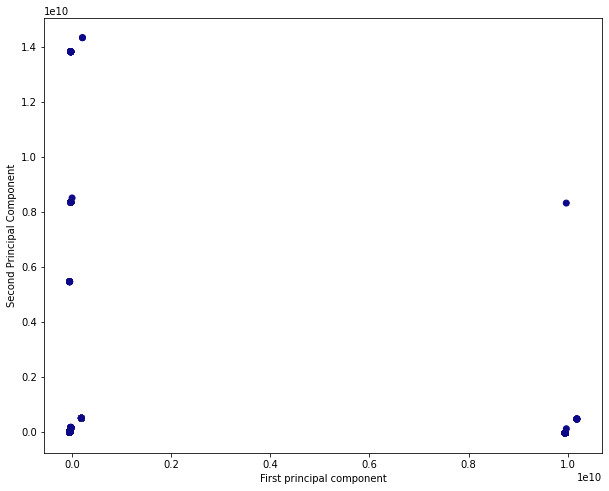

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca_transformed[:,0],x_pca_transformed[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [25]:
################ Preparing Test data ###################
test_data = pd.read_csv('test.csv')
test_data.shape

(75818, 370)

In [13]:
test_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [14]:
test_data['var3'].value_counts()

 2         73962
-999999      120
 8           116
 9           108
 13          107
           ...  
 99            1
 225           1
 132           1
 96            1
 191           1
Name: var3, Length: 199, dtype: int64

In [16]:
test_data['var38'].value_counts()

117310.979016    14805
451931.220000       16
128318.520000       12
288997.440000       10
97639.560000         8
                 ...  
73042.410000         1
42104.100000         1
43691.370000         1
173600.640000        1
113411.190000        1
Name: var38, Length: 57570, dtype: int64

In [26]:
###### repalcing -999999 with 2 
test_data['var3'] = test_data['var3'].replace(-999999, 2)

In [27]:
########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [28]:
correlation(test_data,0.95)

{'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_trasp_var33_out_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var13_medio',
 'ind_var18',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var32',
 'ind_var34',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var7_emit_ult1',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var13_medio_ult3',
 'num_op_v

In [29]:
test_data =  test_data.drop(['delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_trasp_var33_out_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var13_medio',
 'ind_var18',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var32',
 'ind_var34',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var7_emit_ult1',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var13_medio_ult3',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_reemb_var13_ult1',
 'num_trasp_var33_in_ult1',
 'num_trasp_var33_out_ult1',
 'num_var1',
 'num_var12',
 'num_var12_0',
 'num_var13',
 'num_var13_corto',
 'num_var13_corto_0',
 'num_var13_largo',
 'num_var13_medio',
 'num_var14',
 'num_var14_0',
 'num_var18',
 'num_var18_0',
 'num_var1_0',
 'num_var20',
 'num_var20_0',
 'num_var24',
 'num_var24_0',
 'num_var25',
 'num_var25_0',
 'num_var26',
 'num_var29',
 'num_var29_0',
 'num_var32',
 'num_var33',
 'num_var33_0',
 'num_var34',
 'num_var34_0',
 'num_var35',
 'num_var37',
 'num_var39',
 'num_var40',
 'num_var40_0',
 'num_var44',
 'num_var44_0',
 'num_var45_ult3',
 'num_var5',
 'num_var6',
 'num_var6_0',
 'num_var7_emit_ult1',
 'num_var8',
 'num_var8_0',
 'num_venta_var44_hace3',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3',
 'saldo_medio_var13_largo_ult1',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var13_medio_ult1',
 'saldo_medio_var13_medio_ult3',
 'saldo_medio_var17_ult1',
 'saldo_medio_var17_ult3',
 'saldo_medio_var29_ult1',
 'saldo_medio_var29_ult3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var33_ult3',
 'saldo_medio_var44_ult1',
 'saldo_medio_var44_ult3',
 'saldo_medio_var8_ult1',
 'saldo_var1',
 'saldo_var18',
 'saldo_var24',
 'saldo_var25',
 'saldo_var29',
 'saldo_var42',
 'saldo_var6'],axis=1)

In [30]:
test_data.shape

(75818, 249)

In [32]:
################ PCA on entire dataset ##################
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(test_data)
x_pca_transformed_test = pca2.transform(test_data)

In [33]:
rf_y_pred_test = clf_rf.predict(x_pca_transformed_test)

In [34]:
rf_y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
rf_y_pred_test.shape

(75818,)

In [37]:
test_data_actual = np.zeros(75818, dtype=int)

In [38]:
test_data_actual.shape

(75818,)

In [39]:
df_final_output = pd.DataFrame({'actual':test_data_actual,'predicted_PCA':rf_y_pred_test})

In [41]:
df_final_output.value_counts()

actual  predicted_PCA
0       0                75443
        1                  375
dtype: int64

<AxesSubplot:ylabel='Count'>

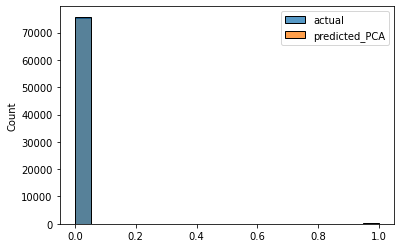

In [43]:
sns.histplot(df_final_output)

Records - 375 -- detected as 1 that means customers are unsatisfied.


Given in problem set :
You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.
1: unsatisfied customers
0 : satisfied customers
    
The task is to predict the probability that each customer in the test set is an unsatisfied customer.
in sample_submission op: 0

In [45]:
df['TARGET'].value_counts()

0    75818
Name: TARGET, dtype: int64

In [47]:
df.shape

(75818, 2)